Saving Cute_dog.jpg to Cute_dog (8).jpg


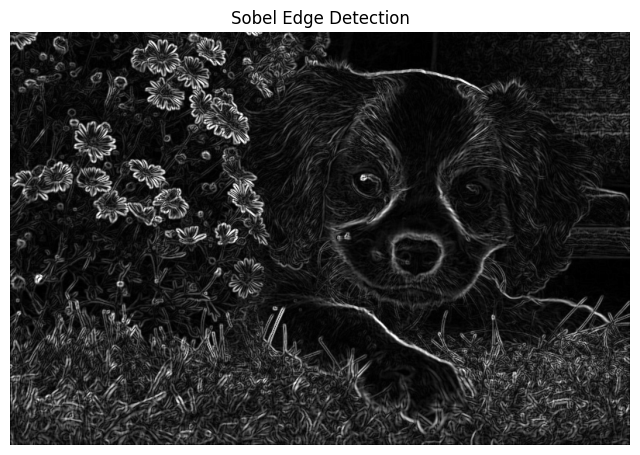

In [9]:
# Import required packages
from google.colab import files
import cv2
import matplotlib.pyplot as plt

# Upload the image
uploaded = files.upload()

# Get the filename of the uploaded image
filename = next(iter(uploaded))

# Read the image
src = cv2.imread(filename)

# ==========================
# SECTION: Gaussian Blur and Sobel Edge Detection
# ==========================
# Apply Gaussian blur
blurred = cv2.GaussianBlur(src, (3, 3), 0)

# Convert image to grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

# Apply Sobel method to the grayscale image
grad_x = cv2.Sobel(gray, cv2.CV_16S, 1, 0, ksize=3, scale=1,
                    delta=0, borderType=cv2.BORDER_DEFAULT)  # Horizontal Sobel Derivation
grad_y = cv2.Sobel(gray, cv2.CV_16S, 0, 1, ksize=3, scale=1,
                    delta=0, borderType=cv2.BORDER_DEFAULT)  # Vertical Sobel Derivation

# Convert to absolute values
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

# Combine gradients
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

# Show the image
plt.figure(figsize=(8, 6))
plt.imshow(grad, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')
plt.show()
